

# Project: Investigate  Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description:
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
- PatientId: Identification of a patient.
- AppointmentID: Identification of each appointment.
- Gender: Male or Female .
- AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False .
- Hypertension: True or False.
- Diabetes: True or False.
- Alcoholism: True or False.
- Handcap: True or False.
- SMS_received: 1 or more messages sent to the patient.
- Show: True or False.

## Questions to explain:

1.What is the percentage of missing the appointment for patients suffering from Diabetes or Hypertension or Alcoholism? 

2.DO Scholarships affect on showing up?

3.Which gender show up the most?

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [94]:
df=pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


here we see an overview about the Dataset

In [95]:
df.shape

(110527, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing values

In [97]:
df.duplicated().sum()

0

there is no duplicated rows

In [98]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is a negative value in Age coloumn


### Data Cleaning


first i have to locate the negative value and drop it

In [99]:
df[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [100]:
df.drop(99832,inplace=True)
df[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


there is wrong in "Hipertension" spelling

In [101]:
df.rename(columns={"Hipertension":"Hypertension"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


convert "ScheduledDay" and "AppointmentDay" to dates

In [102]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


"AppointmentID" should be after the "ScheduledDay". let's see if there is any mistake.

In [103]:
df[df['ScheduledDay']>df['AppointmentDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


let's drop these rows

In [104]:
df.drop([27033,55226,64175,71533,72362],inplace=True)
#let's check
df[df['ScheduledDay']>df['AppointmentDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


"PatientId" and "AppointmentID" are not necessary we can drop them

In [105]:
df.drop(["PatientId","AppointmentID"],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 change "No-show" to "Show" and handle it

In [106]:
df.rename(columns={"No-show":"Show"},inplace=True)
df['Show'] = df['Show'].replace(['No'],'1')
df['Show'] = df['Show'].replace(['Yes'],'0')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


I have changed it to make it easier to read in which:

    1: means that the patient didn't miss his Appointment

    0:means that the patient missed his Appointment

I should convert the data type of "Show" coloumn to numeric

In [107]:
df["Show"] = df["Show"].apply(pd.to_numeric)
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
Show               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis




### let's see a general look on the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89ba3b5588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f89bd593160>]], dtype=object)

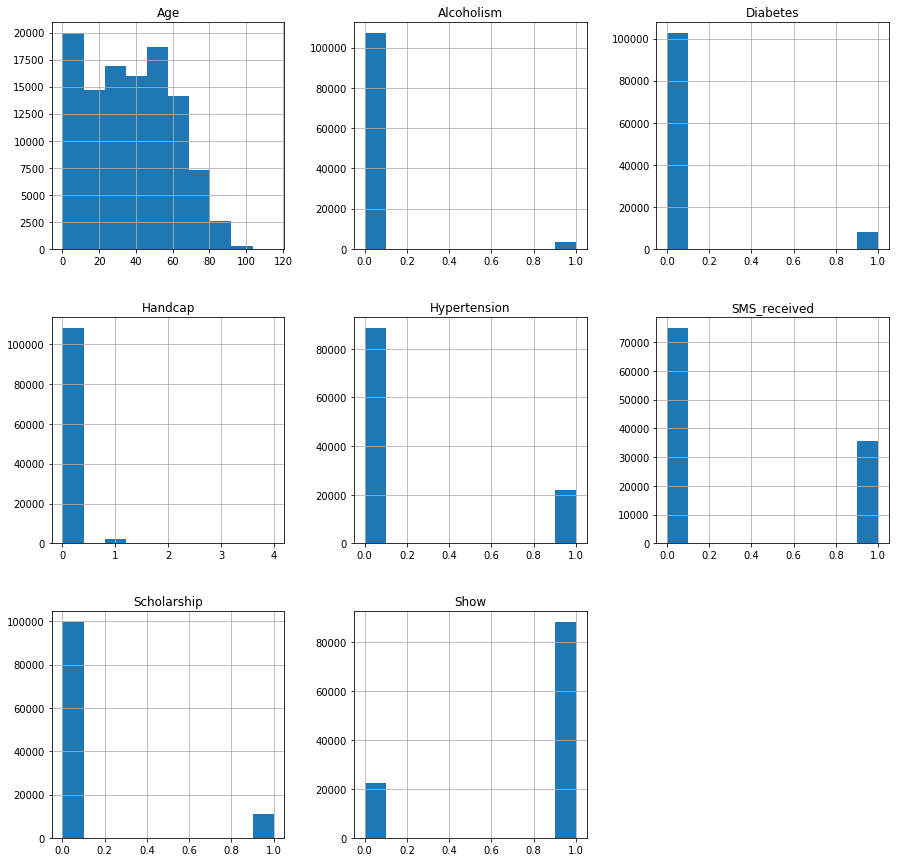

In [108]:
df.hist(figsize=(15,15))

most of the patients had received an SMS_message

most of the patients didn't suffer from diabetes or alcoholism 

About 20% of the patients suffer from Hypertension

### What is the percentage of missing the appointment for patients suffering from Diabetes or Hypertension or Alcoholism? 

In [109]:
df["No-show"].value_counts()

KeyError: 'No-show'

In [ ]:
show=(df['No-show'].value_counts()[0]/df['No-show'].count())*100
print(show)

In [ ]:
no_show=(df['No-show'].value_counts()[1]/df['No-show'].count())*100
print(no_show)

In [110]:
def bar_plot(xlabels,ylabels,title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = xlabels
    y = ylabels
    plt.title(title)
    ax.bar(x,y)
    plt.show()

In [111]:
def pie_plot(sections,counts,tilte):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    x = sections
    y = counts
    plt.title(tilte)
    ax.pie(y, labels = x,autopct='%1.2f%%')
    plt.show()

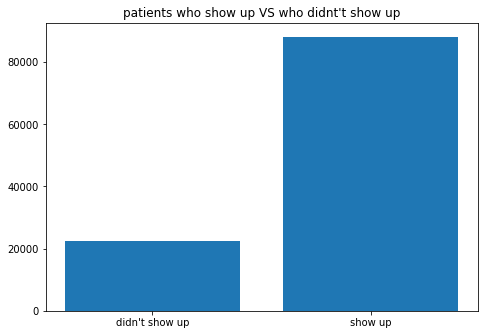

In [112]:
#let's visalize it tm make it simple
x=["show up","didn't show up"]
y=[88207,22314]
bar_plot(x,y,"patients who show up VS who didnt't show up")

,Show
Hypertension,
0,0.791005
1,0.826980


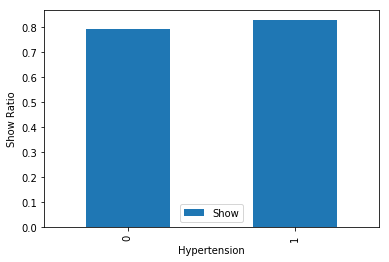

In [113]:
df.groupby(["Hypertension"])[["Show"]].mean().plot(kind="bar").set_ylabel("Show Ratio")
df.groupby(["Hypertension"])[["Show"]].mean()

it looks like the average of patients (suffering from Hypertension) who show up is bigger than who didn't suffer from it which means that Hypertansion has no  effect on missing the Appointment


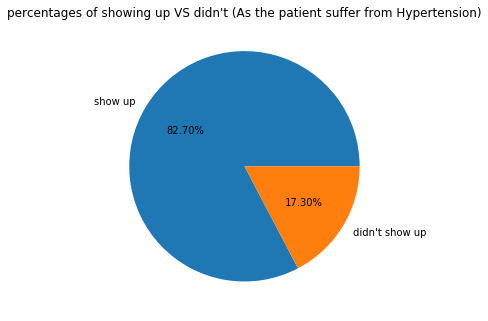

In [114]:
sections=["show up","didn't show up"]
counts=[18029,3772]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Hypertension)")

the percentge of missing the appointment for patients suffering from Hypertension is 17.3%

,Show
Diabetes,
0,0.796409
1,0.819967


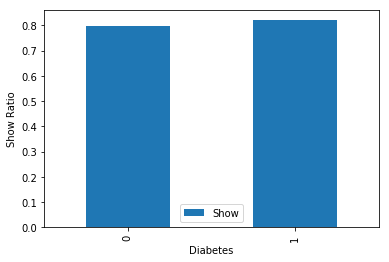

In [115]:
df.groupby(["Diabetes"])[["Show"]].mean().plot(kind="bar").set_ylabel("Show Ratio")
df.groupby(["Diabetes"])[["Show"]].mean()

it looks like the average of patients (suffering from Diabetes) who show up is bigger than who didn't suffer from it which means that Diabetes has no huge effect on missing the Appointment



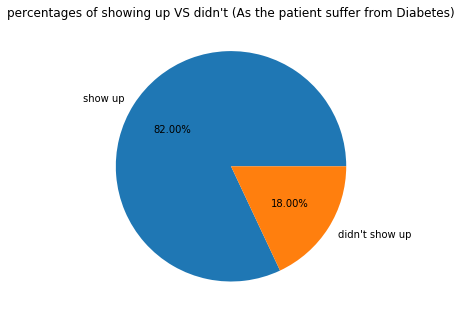

In [116]:
sections=["show up","didn't show up"]
counts=[6513,1430]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Diabetes)")

the percentage of missing the appointment for patients suffering from Diabetes is 18%

,Show
Alcoholism,
0,0.798089
1,0.798512


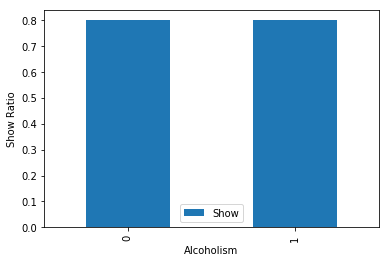

In [117]:
df.groupby(["Alcoholism"])[["Show"]].mean().plot(kind="bar").set_ylabel("Show Ratio")
df.groupby(["Alcoholism"])[["Show"]].mean()

it looks like the average of patients (suffering from Alcoholism) who show up is very close to who didn't suffer from it which means that Alcoholism has negligible effect on missing the appoinment


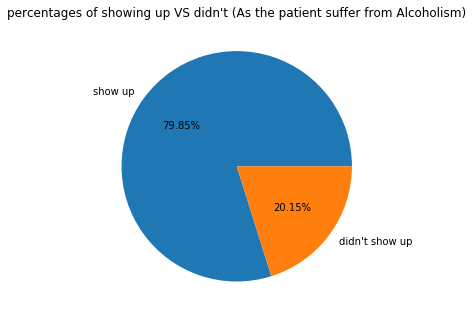

In [118]:
sections=["show up","didn't show up"]
counts=[2683,677]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Alcoholism)")

the percentage of missing the appointment for patients suffering from Alcoholism is 20.15%

### DO Scholarships affect on showing up?

,Show
Scholarship,
0,0.801967
1,0.762637


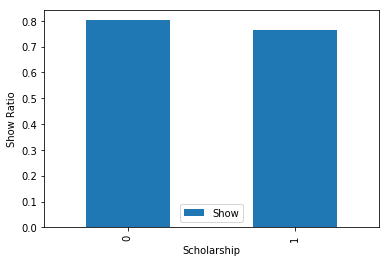

In [119]:
df.groupby(["Scholarship"])[["Show"]].mean().plot(kind="bar").set_ylabel("Show Ratio")
df.groupby(["Scholarship"])[["Show"]].mean()

it looks like the average of patients (Having Scholarship) who show up is bigger than  who didn't suffer from it which means that Scholarships has effect on missing the Appointment

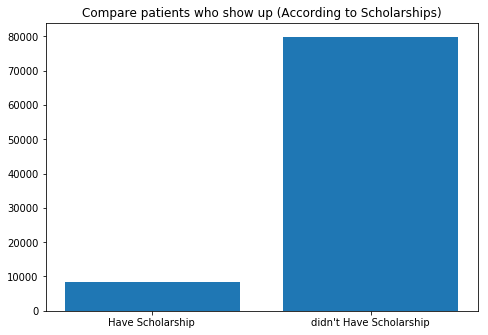

In [120]:
x=["Have Scholarship ","didn't Have Scholarship"]
y=[8283,79924]
bar_plot(x,y,"Compare patients who show up (According to Scholarships)")

### Which gender show up the most?

,Show
Gender,
F,0.796885
M,0.800362


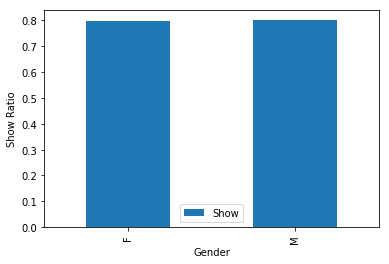

In [121]:
df.groupby(["Gender"])[["Show"]].mean().plot(kind="bar").set_ylabel("Show Ratio")
df.groupby(["Gender"])[["Show"]].mean()

There is no a big difference between men and women in not showing up for the appointment

<a id='conclusions'></a>
## Conclusions

1.the percentge of missing the appointment for patients suffering from Hypertension is 17.3% 

   the percentage of missing the appointment for patients suffering from Diabetes is 18%
  
   the percentage of missing the appointment for patients suffering from Alcoholism is 20.15%
   
2.Alcoholism,Diabetes,Hypertension has no effect on missing the appoinment 
  
3.Scholarships affect on showing up

4.There is no a big difference between men and women in not showing up for the appointment

### Limitations
1.There was a negative value in Age coloum which i had to drop it

2.There was a worng in spelling of "Hypertension" so i had to correct it

3."AppointmentDay" and "ScheduledDay" i had to convert their datatypes to datetime

4.there was some rows where ScheduledDay was after AppointmentDay so i  dropped them

5."PatientId" and "AppointmentID" were not necessary coloumn so i dropped them 

6.I changed "No-show" column to "Show" and changed it's data type to numeric to make it easier in reading

In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0